In [2]:
import pandas as pd
from tabulate import tabulate 
from scipy.stats import pearsonr
import matplotlib.pyplot as plt 
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt

In [7]:
LEdata = pd.read_csv('https://raw.githubusercontent.com/tstef87/IDS/main/HW3/Life_Expectancy.csv')

LEdata.head()

,Country,Year,Life_Expectancy,Adult_Mortality,Alcohol,Percentage_Expenditure,BMI,Total_Expenditure,GDP,Population,Schooling
0,Afghanistan,2010,58.8,279,0.01,79.679367,16.7,9.20,553.328940,2883167,9.2
1,Afghanistan,2011,59.2,275,0.01,7.097109,17.2,7.87,63.537231,2978599,9.5
2,Afghanistan,2012,59.5,272,0.01,78.184215,17.6,8.52,669.959000,3696958,9.8
3,Afghanistan,2013,59.9,268,0.01,73.219243,18.1,8.13,631.744976,31731688,9.9
4,Afghanistan,2014,59.9,271,0.01,73.523582,18.6,8.18,612.696514,327582,10.0


In [8]:
LEdata.shape

(90, 11)

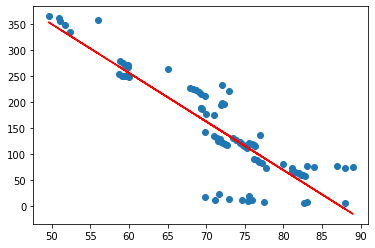

In [12]:
X = LEdata.iloc[:, 2].values.reshape(-1,1)
Y = LEdata.iloc[:, 3].values.reshape(-1,1)

LRmodel = LinearRegression()  

# Perform linear regression
LRmodel.fit(X, Y)   


# Make predictions
Y_pred = LRmodel.predict(X)  


# Visualize the dataset and the regression line:
plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

plt.show()



In [11]:
data1 = LEdata['Life_Expectancy']
data2 = LEdata['Adult_Mortality']

corr, _ = pearsonr(data1, data2)
print('Pearsons correlation: %.5f' % corr)

Pearsons correlation: -0.86553


In [15]:
#Does life expectancy have positive or negative correlation 
#with eating habits, drinking alcohol, social factors, and economic factors?

eatingHabits,_ = pearsonr(LEdata['BMI'], data1)
alcohol,_ = pearsonr(LEdata['Alcohol'], data1)
social,_ = pearsonr(LEdata['Percentage_Expenditure'], data1)
economic,_ = pearsonr(LEdata['GDP'], data1)

print ('Eating Habits correlation = %.5f' % eatingHabits)
print ('Drinking Alcohol correlation = %.5f' % alcohol)
print ('Social Factors correlation = %.5f' % social)
print ('Economic Factors correlation = %.5f' % economic)



Eating Habits correlation = 0.69849
Drinking Alcohol correlation = 0.35452
Social Factors correlation = 0.48980
Economic Factors correlation = 0.55269


School correlation = 0.75168


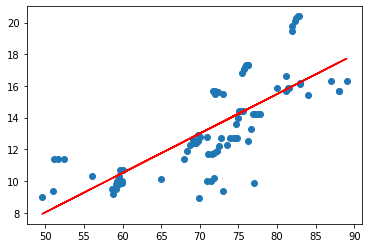

In [23]:
Y = LEdata.iloc[:, 10].values.reshape(-1,1)

LRmodel = LinearRegression()  
LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)  

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')

school,_ = pearsonr (LEdata['Schooling'], data1)
print ('School correlation = %.5f' % school)


Eating Habits correlation = 0.69849
MSE:  211.9295685370354
R2:  0.4878817285865854


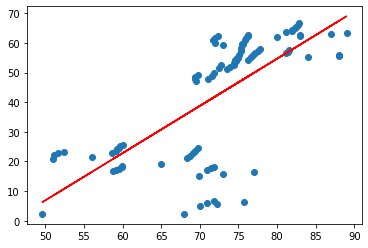

In [22]:
#Create and plot several linear regression models for 
#life expectancy (as the dependent variable) and the independent 
#variables that had the highest correlation with life expectancy 
#as found in your correlation analysis.

print ('Eating Habits correlation = %.5f' % eatingHabits)

Y = LEdata.iloc[:, 6].values.reshape(-1,1)

LRmodel = LinearRegression()  
LRmodel.fit(X, Y)   

Y_pred = LRmodel.predict(X)  

plt.scatter(X, Y)
plt.plot(X, Y_pred, color='red')


print("MSE: ", mean_squared_error(Y, Y_pred))
print("R2: ", r2_score(Y, Y_pred))
